In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_with_desc = pd.read_csv('../data/data_with_desc.csv')
lst_dates = data_with_desc['LST_DATE'].unique()
lst_dates

array([20210101, 20210102, 20210103, 20210104, 20210105, 20210106,
       20210107, 20210108, 20210109, 20210110, 20210111, 20210112,
       20210113, 20210114, 20210115, 20210116, 20210117, 20210118,
       20210119, 20210120, 20210121, 20210122, 20210123, 20210124,
       20210125, 20210126, 20210127, 20210128, 20210129, 20210130,
       20210131, 20210201, 20210202, 20210203, 20210204, 20210205,
       20210206, 20210207, 20210208, 20210209, 20210210, 20210211,
       20210212, 20210213, 20210214, 20210215, 20210216, 20210217,
       20210218, 20210219, 20210220, 20210221, 20210222, 20210223,
       20210224, 20210225, 20210226, 20210227, 20210228, 20210301,
       20210302, 20210303, 20210304, 20210305, 20210306, 20210307,
       20210308, 20210309, 20210310, 20210311, 20210312, 20210313,
       20210314, 20210315, 20210316, 20210317, 20210318, 20210319,
       20210320, 20210321, 20210322, 20210323, 20210324, 20210325,
       20210326, 20210327, 20210328, 20210329, 20210330, 20210

In [22]:
# Load the headers from the headers.txt file
headers_file = '../data/raw/headers.txt'
with open(headers_file, 'r') as file:
    headers = file.read().strip().split()[1:]  # Skip the column numbers and take the headers
print(headers)
# Load the data from the CRNS0101-05-2021-AK_Aleknagik_1_NNE - Copy.txt file
data_file_2021 = '../data/raw/CRNS0101-05-2021-AK_Aleknagik_1_NNE.txt'
data_file_2022 = '../data/raw/CRNS0101-05-2022-AK_Aleknagik_1_NNE.txt'

# Read the data into DataFrames
data_2021 = pd.read_csv(data_file_2021, sep='\s+', header=None, names=headers)
data_2022 = pd.read_csv(data_file_2022, sep='\s+', header=None, names=headers)

data = pd.concat([data_2021, data_2022])

# Convert appropriate columns to numeric types
numeric_cols = [
    "AIR_TEMPERATURE", "PRECIPITATION", "SOLAR_RADIATION", "SR_FLAG",
    "SURFACE_TEMPERATURE", "ST_FLAG", "RELATIVE_HUMIDITY", "RH_FLAG",
    "SOIL_MOISTURE_5", "SOIL_TEMPERATURE_5", "WETNESS", "WET_FLAG", "WIND_1_5", "WIND_FLAG"
]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

filtered_data = data[data['LST_DATE'].isin(lst_dates)]

# Pivot the DataFrame to get the desired format
air_temp_df = filtered_data.pivot(index="LST_DATE", columns="LST_TIME", values="AIR_TEMPERATURE")
surface_temp_df = filtered_data.pivot(index="LST_DATE", columns="LST_TIME", values="SURFACE_TEMPERATURE")
# sorted_columns =filtered_data.pivot(index="LST_DATE", columns="LST_TIME", values="SURFACE_TEMPERATURE")
# Sort columns to match the desired output format
sorted_columns = sorted(air_temp_df.columns, key=lambda x: int(x))
air_temp_df = air_temp_df[sorted_columns].dropna()
surface_temp_df = surface_temp_df[sorted_columns].dropna()

['UTC_DATE', 'UTC_TIME', 'LST_DATE', 'LST_TIME', 'CRX_VN', 'LONGITUDE', 'LATITUDE', 'AIR_TEMPERATURE', 'PRECIPITATION', 'SOLAR_RADIATION', 'SR_FLAG', 'SURFACE_TEMPERATURE', 'ST_TYPE', 'ST_FLAG', 'RELATIVE_HUMIDITY', 'RH_FLAG', 'SOIL_MOISTURE_5', 'SOIL_TEMPERATURE_5', 'WETNESS', 'WET_FLAG', 'WIND_1_5', 'WIND_FLAG']


In [ ]:
surface_temp_df

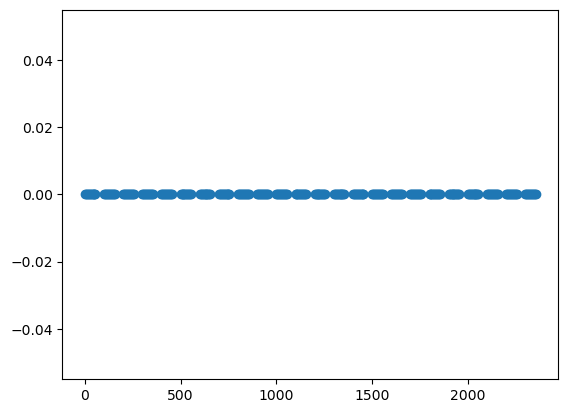

In [23]:
row_to_plot = surface_temp_df.loc[20210111]
plt.plot(row_to_plot.index, row_to_plot.values, marker='o')